- import italy-covid-daywise.csv which
contains day-wise Covid-19 data for Italy 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\Omar Elgema3y\Desktop\web scraping\italy-covid-daywise.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


- retrieve the number of rows
and columns in the data frame


In [6]:
rows=df.shape[0]
columns=df.shape[1]
print(f"number of rows={rows},number of columns={columns}")


number of rows=248,number of columns=4


In [7]:
df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


- view statistical
information for numerical columns

In [8]:
df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


- view some basic information
about the data frame like data types, and number of non-nulls

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


- create a list of columns
within the data frame


In [11]:
col_list=df.columns.tolist()
col_list

['date', 'new_cases', 'new_deaths', 'new_tests']

- return only the days which
had more than 1000 reported cases

In [15]:
cases = df[df["new_cases"] > 1000]
cases["date"]

68     2020-03-08
69     2020-03-09
70     2020-03-10
72     2020-03-12
73     2020-03-13
          ...    
241    2020-08-28
242    2020-08-29
243    2020-08-30
244    2020-08-31
247    2020-09-03
Name: date, Length: 72, dtype: object

- create positive_rate column
that is equal to new_cases / new_tests

In [24]:
df['positive_rate']=df['new_cases']/df['new_tests']
df['positive_rate']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Name: positive_rate, Length: 248, dtype: float64

- let's remove the positive_rate column

In [25]:
df=df.drop(columns=['positive_rate'])
df.head()


,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


- sort to identify the days
with the highest number of cases


In [32]:
high_cases= df.sort_values("new_cases", ascending=False)
high_cases

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
19,2020-01-19,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN


- check the data type of date column,
then convert it into a datetime

In [37]:
df["date"].dtype

#object type

dtype('O')

In [40]:
df['date']=pd.to_datetime(df['date'])
df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

- extract different parts
(day, month, weekday, and year) of the date column into separate columns

In [41]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday']=df['date'].dt.weekday
df['year'] = df['date'].dt.year
df

,date,new_cases,new_deaths,new_tests,day,month,weekday,year
0,2019-12-31,0.0,0.0,NaN,31,12,1,2019
1,2020-01-01,0.0,0.0,NaN,1,1,2,2020
2,2020-01-02,0.0,0.0,NaN,2,1,3,2020
3,2020-01-03,0.0,0.0,NaN,3,1,4,2020
4,2020-01-04,0.0,0.0,NaN,4,1,5,2020
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,30,8,6,2020
244,2020-08-31,1365.0,4.0,42583.0,31,8,0,2020
245,2020-09-01,996.0,6.0,54395.0,1,9,1,2020
246,2020-09-02,975.0,8.0,NaN,2,9,2,2020


- check the overall metrics
for May (i.e, the total numbers of 'new_cases', 'new_deaths', 'new_tests')

In [47]:
may=df[(df['date'].dt.month == 5)]
may_new_cases = may['new_cases'].sum()
may_new_deaths = may['new_deaths'].sum()
may_new_tests = may['new_tests'].sum()
print(f"for may :\nnew cases={may_new_cases}\nnew deaths={may_new_deaths}\nnew tests={may_new_tests}")

for may :
new cases=29073.0
new deaths=5658.0
new tests=1078720.0


- which day seems like have more cases?

In [53]:
max_cases= df.sort_values("new_cases", ascending=False).head(1)
max_cases[['day','month','year','new_cases']]

,day,month,year,new_cases
82,22,3,2020,6557.0


- create a new dataframe with
month-wise data




In [57]:
month_wise_data = df.groupby(df['date'].dt.to_period("M")).agg({'new_cases': 'sum',
                                                                'new_deaths': 'sum',
                                                                'new_tests': 'sum'}
                                                                ).reset_index()
month_wise_data

,date,new_cases,new_deaths,new_tests
0,2019-12,0.0,0.0,0.0
1,2020-01,3.0,0.0,0.0
2,2020-02,885.0,21.0,0.0
3,2020-03,100851.0,11570.0,0.0
4,2020-04,101852.0,16091.0,419591.0
5,2020-05,29073.0,5658.0,1078720.0
6,2020-06,7772.0,1404.0,830354.0
7,2020-07,6722.0,388.0,797692.0
8,2020-08,21060.0,345.0,1098704.0
9,2020-09,3297.0,20.0,54395.0


- plot a line graph showing
how the number of daily cases varies over time.

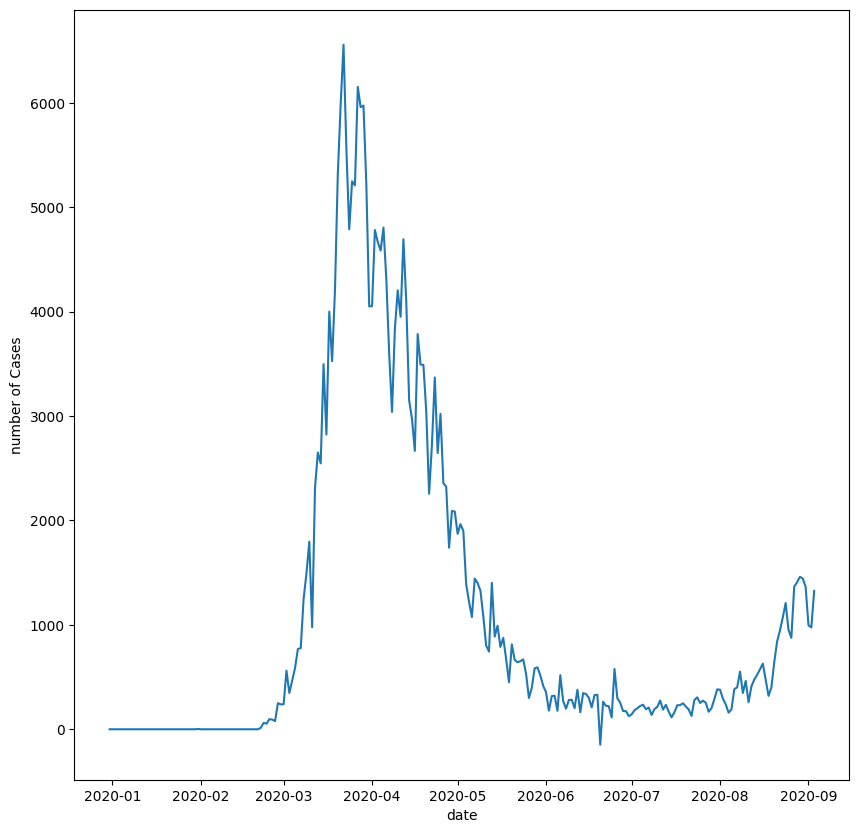

In [75]:
plt.figure(figsize=(10,10))
plt.plot(df['date'], df['new_cases'])
plt.xlabel('date')
plt.ylabel('number of Cases')
plt.show()